In [1]:
import numpy as np
import matplotlib.pyplot as plt

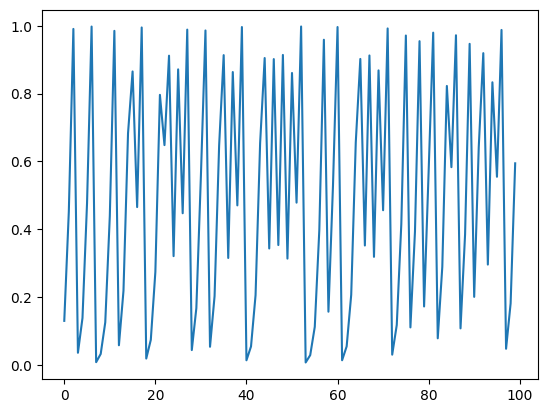

In [16]:
def logistic_map(x, r):
    """Compute the next value in the logistic map sequence."""
    return r * x * (1 - x)

def generate_logistic_map_sequence(r, x0, n):
    """Generate a sequence of values from the logistic map."""
    sequence = np.zeros(n)
    sequence[0] = x0
    for i in range(1, n):
        sequence[i] = logistic_map(sequence[i - 1], r)
    return sequence

seq1 = generate_logistic_map_sequence(4.0, 0.13, 1000)

plt.plot(seq1[:100])


/tmp/ipykernel_66365/2548201530.py:3: RuntimeWarning: invalid value encountered in arccos
  return np.cos(n * np.arccos(1 - 2 * x))


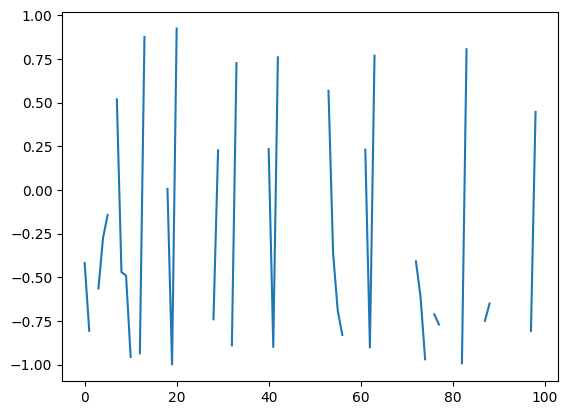

In [18]:
def chebyshev(n, x):
    """Compute the Chebyshev polynomial of the first kind."""
    return np.cos(n * np.arccos(1 - 2 * x)) 

test = chebyshev(4, 1 - 2 * seq1)
plt.plot(test[:100])

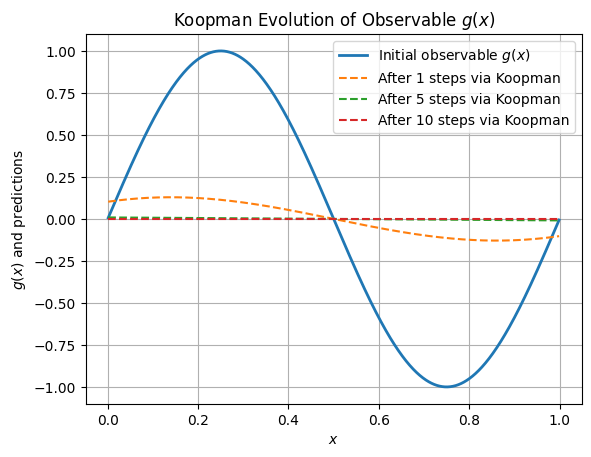

In [19]:
from numpy.polynomial.chebyshev import Chebyshev
from scipy.integrate import quad

# --- Parameters ---
r = 4.0
n_basis = 10  # Number of Chebyshev eigenfunctions to use
x_vals = np.linspace(0.001, 0.999, 1000)  # Avoid 0 and 1 due to singularities
rho = lambda x: 1 / (np.pi * np.sqrt(x * (1 - x)))  # Invariant density

# Observable to evolve (choose any function here)
g = lambda x: np.sin(2 * np.pi * x)

# --- Project observable onto Chebyshev basis ---
def cheb_Tn(n, x):
    return np.cos(n * np.arccos(1 - 2 * x))

def inner_product(f, g):
    integrand = lambda x: f(x) * g(x) * rho(x)
    return quad(integrand, 0, 1, limit=100)[0]

coeffs = []
for n in range(n_basis):
    phi_n = lambda x, n=n: cheb_Tn(n, x)
    c_n = inner_product(g, phi_n)
    coeffs.append(c_n)

# --- Koopman eigenvalues for r = 4 case ---
lambdas = [2**-n for n in range(n_basis)]

# --- Time evolution using Koopman operator ---
def koopman_predict(x, t_steps):
    prediction = np.zeros_like(x)
    for n in range(n_basis):
        phi_n = cheb_Tn(n, x)
        prediction += coeffs[n] * (lambdas[n] ** t_steps) * phi_n
    return prediction

# --- Visualization ---
fig, ax = plt.subplots()
ax.plot(x_vals, g(x_vals), label='Initial observable $g(x)$', linewidth=2)

for t in [1, 5, 10]:
    evolved = koopman_predict(x_vals, t)
    ax.plot(x_vals, evolved, '--', label=f'After {t} steps via Koopman')

ax.set_title("Koopman Evolution of Observable $g(x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$g(x)$ and predictions")
ax.legend()
plt.grid(True)
plt.show()

TypeError: __init__() got multiple values for argument 'frames'

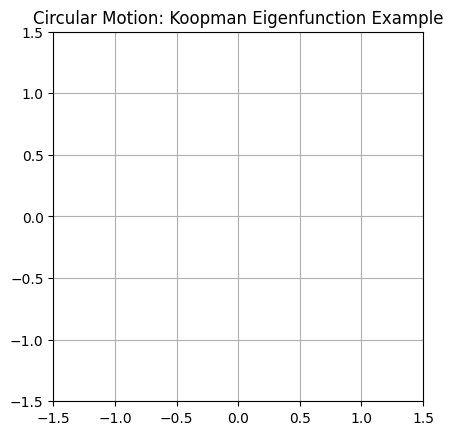

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
omega = 2 * np.pi  # frequency: 1 Hz
T = 2              # total time in seconds
dt = 0.01          # time step
t = np.arange(0, T, dt)

# Initial condition
x0, y0 = 1.0, 0.0

# Trajectory in time (circular motion)
x = x0 * np.cos(omega * t) - y0 * np.sin(omega * t)
y = x0 * np.sin(omega * t) + y0 * np.cos(omega * t)

# Create the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Circular Motion: Koopman Eigenfunction Example")

# Line and point for animation
line, = ax.plot([], [], lw=2, label="Trajectory")
point, = ax.plot([], [], 'ro')
traj_x, traj_y = [], []

# Initialize function
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Animation update function
def update(frame, line, point):
    traj_x.append(x[frame])
    traj_y.append(y[frame])
    line.set_data(traj_x, traj_y)
    point.set_data(x[frame], y[frame])
    return line, point

# Create the animation
ani = animation.FuncAnimation(
    fig, update, line, point, frames=len(t), init_func=init,
    blit=True, interval=dt*1000, repeat=True
)

plt.legend()
plt.show()  # Prevent display of static plot
ani.save("koopman_circular_motion.gif", fps=30)

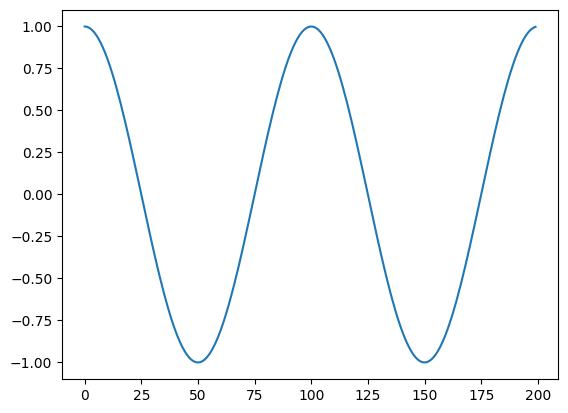

In [11]:
plt.plot(x)

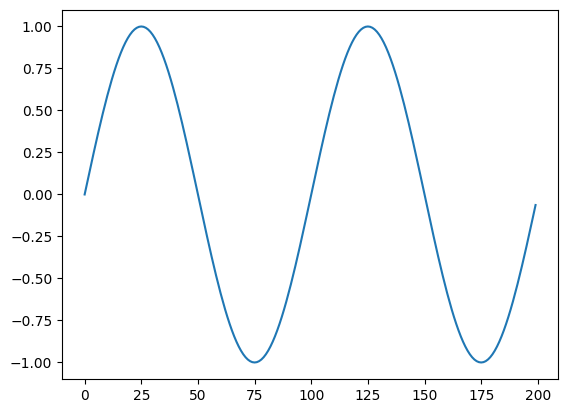

In [12]:
plt.plot(y)

In [19]:
def phi_1(x, y):
    return complex(x, y)

In [21]:
phi_1(x, y)

TypeError: only length-1 arrays can be converted to Python scalars

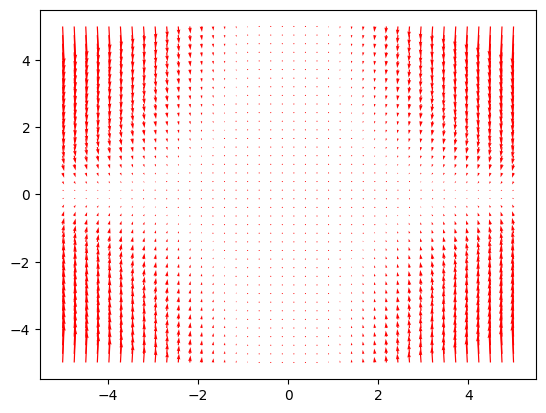

In [27]:
mu = -0.05
lmbda = 1 
dx1_dt = lambda x1, x2: mu * x1
dx2_dt = lambda x1, x2: lmbda * (x2 - x1**2)
# make meshgrid
x1 = np.linspace(-5, 5, 40)
x2 = np.linspace(-5, 5, 40)
X1, X2 = np.meshgrid(x1, x2)

# compute the vector field
U = dx1_dt(X1, X2)
V = dx2_dt(X1, X2)

# plot the vector field
plt.quiver(X1, X2, U, V, color='r')

